<a href="https://colab.research.google.com/github/sravannaidu/GenAI/blob/main/Case_Study_News%20Articles_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study - Identifying relavant US Economy News Articles

-- The dataset consist of 8000 news articles annotated with whether or not they are relavant to US Economy (i.e. a yes/no binary classification).

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/full_economic_news_articles.csv', encoding="latin1")
df.head()

,relevance,articleid,date,headline,text
0,yes,wsj_398217788,8/14/91,Yields on CDs Fell in the Latest Week,NEW YORK -- Yields on most certificates of dep...
1,no,wsj_399019502,8/21/07,The Morning Brief: White House Seeks to Limit ...,The Wall Street Journal Online</br></br>The Mo...
2,no,wsj_398284048,11/14/91,Banking Bill Negotiators Set Compromise --- Pl...,WASHINGTON -- In an effort to achieve banking ...
3,no,wsj_397959018,6/16/86,Manager's Journal: Sniffing Out Drug Abusers I...,The statistics on the enormous costs of employ...
4,yes,wsj_398838054,10-04-2002,Currency Trading: Dollar Remains in Tight Rang...,NEW YORK -- Indecision marked the dollar's ton...


In [3]:
df.shape

(8000, 5)

In [4]:
# Relavant Article : Talks about Economy
df.loc[0, 'text']

'NEW YORK -- Yields on most certificates of deposit offered by major banks dropped more than a tenth of a percentage point in the latest week, reflecting the overall decline in short-term interest rates.</br></br>On small-denomination, or "consumer," CDs sold directly by banks, the average yield on six-month deposits fell to 5.49% from 5.62% in the week ended yesterday, according to an 18-bank survey by Banxquote Money Markets, a Wilmington, Del., information service.</br></br>On three-month "consumer" deposits, the average yield sank to 5.29% from 5.42% the week before, according to Banxquote. Two banks in the Banxquote survey, Citibank in New York and CoreStates in Pennsylvania, are paying less than 5% on threemonth small-denomination CDs.</br></br>Declines were somewhat smaller on five-year consumer CDs, which eased to 7.37% from 7.45%, Banxquote said.</br></br>Yields on three-month and six-month Treasury bills sold at Monday\'s auction plummeted more than a fifth of a percentage po

In [5]:
# Non Relavant Article : Looks like talking about Health Insurance
df.loc[1, 'text']

'The Wall Street Journal Online</br></br>The Morning Brief, a look at the day\'s biggest news, is emailed to subscribers by 7 a.m. every business day. Sign up for the e-mail here.</br></br>On Friday evening, with Congress out of town on its summer recess and Americans heading into a mid-August weekend, the Bush administration sent a message to the states: The federal government will make it tougher for a national children\'s insurance program to cover the offspring of middle-income families.</br></br>The State Children\'s Health Insurance Program was created in 1997 to help children whose families couldn\'t afford insurance but didn\'t qualify for Medicaid, and administration officials tell the New York Times that the changes are aimed at returning the program to its low- income focus and assuring it didn\'t become a replacement for private insurance. Administration point man Dennis Smith wrote to state officials saying there would be new restrictions on the District of Columbia and th

In [6]:
# Distribution on target variable looks non-uniform

df['relevance'].value_counts(normalize=True)

,proportion
relevance,
no,0.821375
yes,0.177500
not sure,0.001125


In [7]:
df['relevance'] = np.where(df['relevance']=='not sure','no',df['relevance'])

In [8]:
df['relevance'].value_counts(normalize=True)

,proportion
relevance,
no,0.8225
yes,0.1775


In [9]:
# Convert label to a numerical variable
df['relevance'] = df.relevance.map({'yes':1, 'no':0})
# relevant is 1, non-relevant is 0
df['relevance'].value_counts(normalize=True)

,proportion
relevance,
0,0.8225
1,0.1775


In [10]:
df['text']

,text
0,NEW YORK -- Yields on most certificates of dep...
1,The Wall Street Journal Online</br></br>The Mo...
2,WASHINGTON -- In an effort to achieve banking ...
3,The statistics on the enormous costs of employ...
4,NEW YORK -- Indecision marked the dollar's ton...
...,...
7995,Secretary of Commerce Charles W. Sawyer said y...
7996,"U.S. stocks inched up last week, overcoming co..."
7997,Ben S. Bernanke cleared a key hurdle Thursday ...
7998,The White House's push to contract out many fe...


In [12]:
# Visualization on overall Word Cloud from the given dataset
# !pip install wordcloud


In [13]:
from wordcloud import WordCloud

wc = WordCloud(width=1600, height=800, background_color='blue',).generate(' '.join(df['text']))

In [14]:
wc

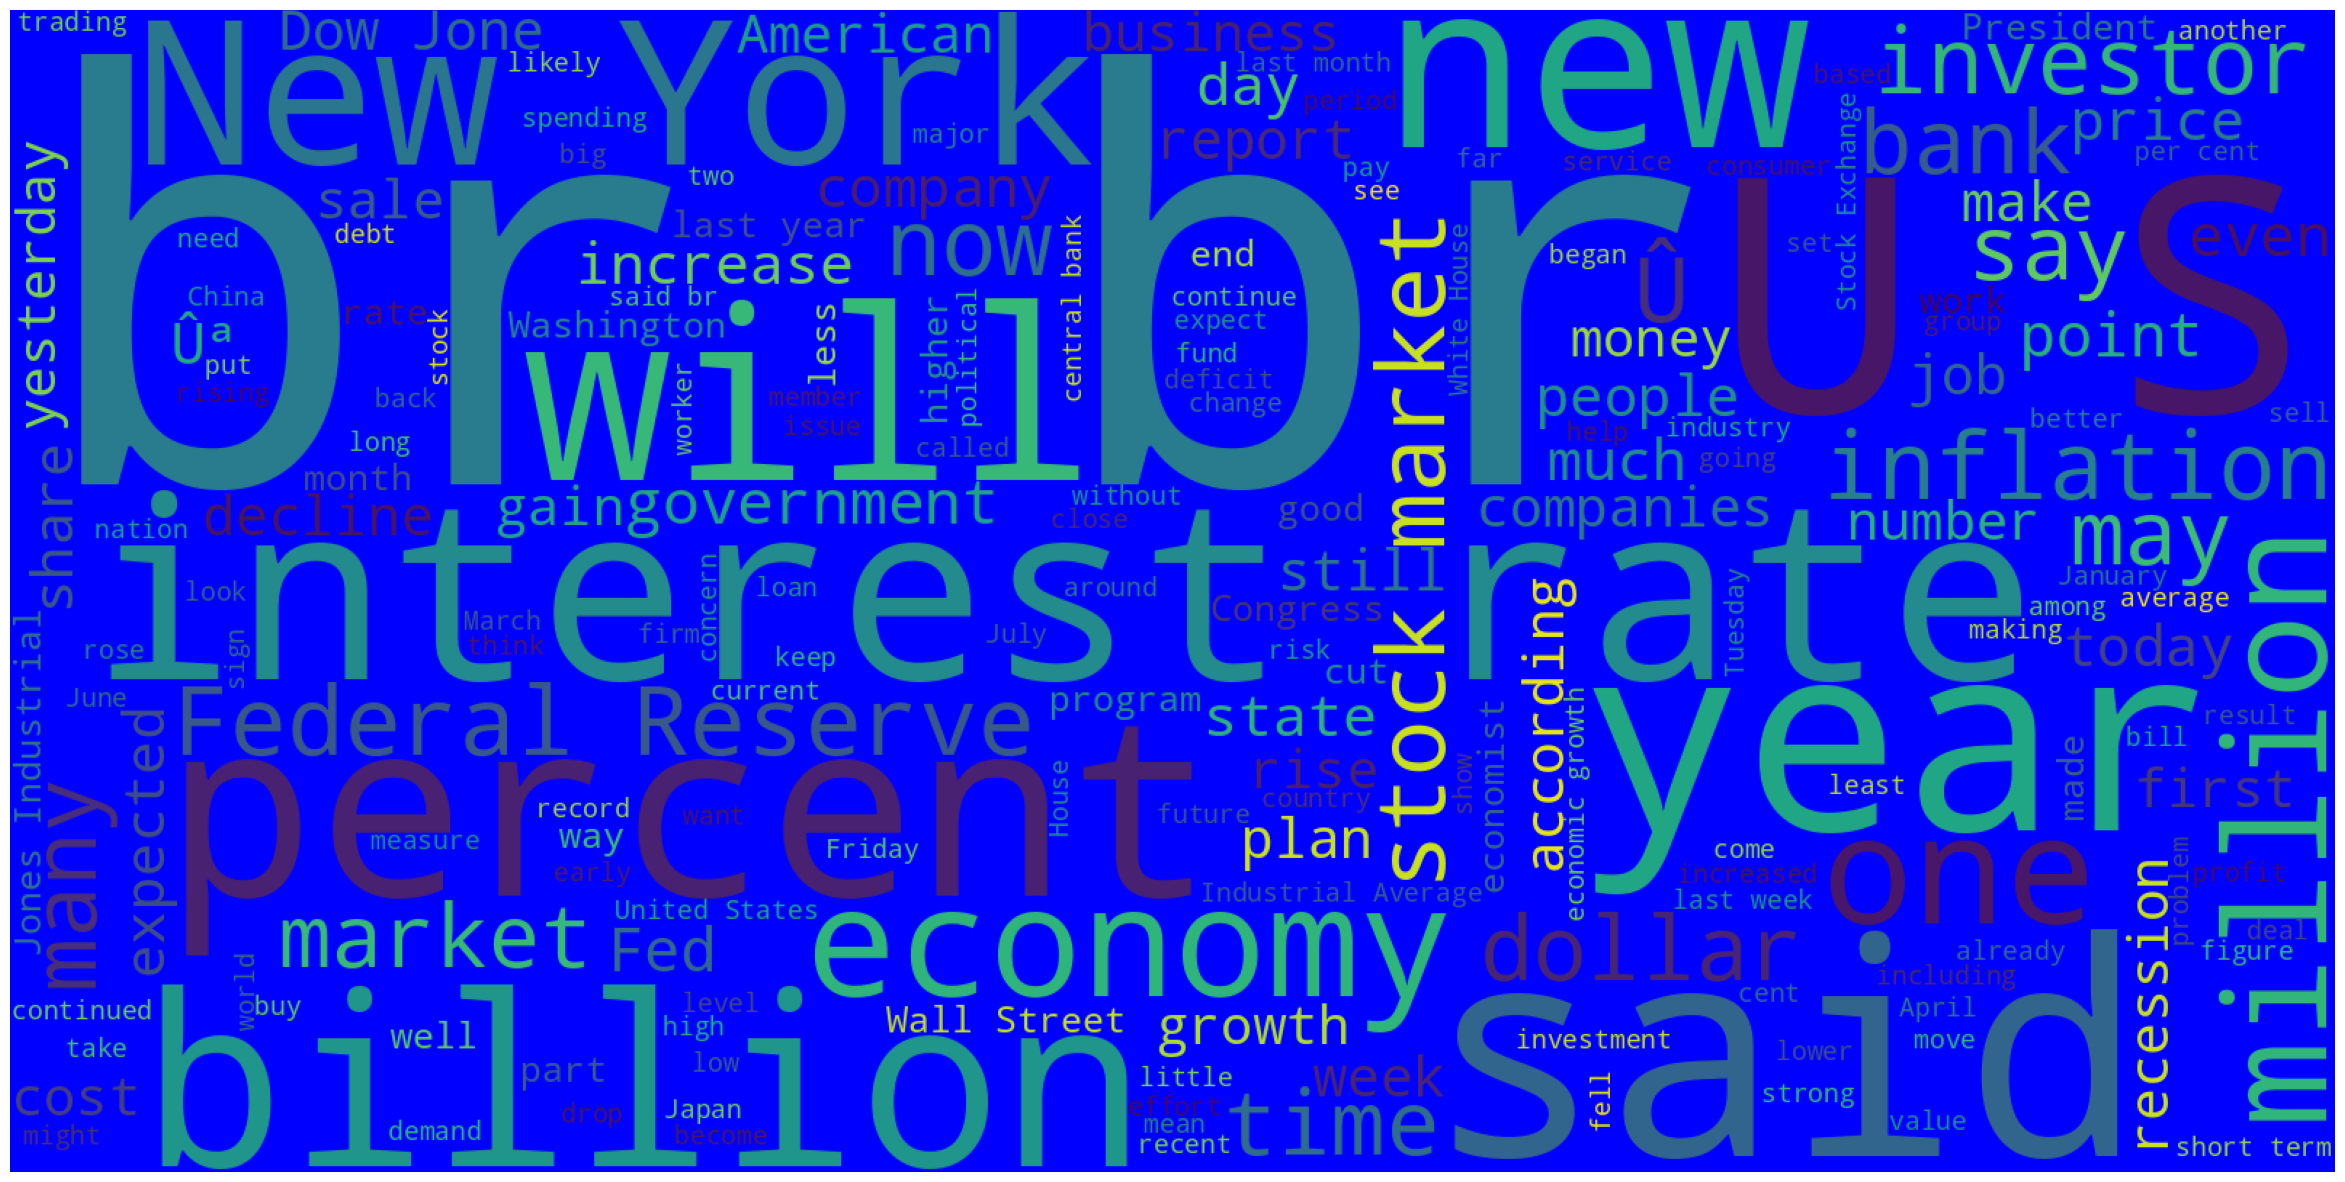

In [15]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [16]:
# Let us take only the two columns we need
df = df[["text", "relevance"]]
df.head()

,text,relevance
0,NEW YORK -- Yields on most certificates of dep...,1
1,The Wall Street Journal Online</br></br>The Mo...,0
2,WASHINGTON -- In an effort to achieve banking ...,0
3,The statistics on the enormous costs of employ...,0
4,NEW YORK -- Indecision marked the dollar's ton...,1


# Step 1 - Identify input and output

In [17]:
x = df.text
y = df.relevance
print(x.shape, y.shape)

(8000,) (8000,)


In [18]:
y

,relevance
0,1
1,0
2,0
3,0
4,1
...,...
7995,1
7996,0
7997,0
7998,0


In [19]:
y.value_counts(normalize=True)

,proportion
relevance,
0,0.8225
1,0.1775


In [20]:
y.value_counts()

,count
relevance,
0,6580
1,1420


# Step 2 - Split the Data into Train and Test

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.25, random_state=0, stratify=y)
print(x_train.shape, y_train.shape)
print()
print(x_test.shape, y_test.shape)

(6000,) (6000,)

(2000,) (2000,)


In [22]:
x_train

,text
6592,Former Federal Reserve Board Chairman Arthur F...
3251,"NEW YORK -- Of Samuel Heyman, it might be said..."
444,Don't Bet on Fed</br></br>To Give Shelter</br>...
3610,A bevy of household names rushed to sell cheap...
5414,-- If there's a threat of dangerous deflation ...
...,...
5436,PUBLISHED CORRECTIONS: A June 10 Style article...
5073,Future historians tracing the crackup of the R...
5916,"Fearful of what an Asian meltdown, the preside..."
1072,"LONDON -- In 1970, when Charles Saatchi was 26..."


# Step 3 - Data Preprocessing on train data (x_train)

In [23]:
from wordcloud import WordCloud
def display_wordcloud(data):
    wc = WordCloud(width=1600, height=800, background_color='blue',).generate(' '.join(data))
    import matplotlib.pyplot as plt
    plt.figure(1, figsize=(30,20))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

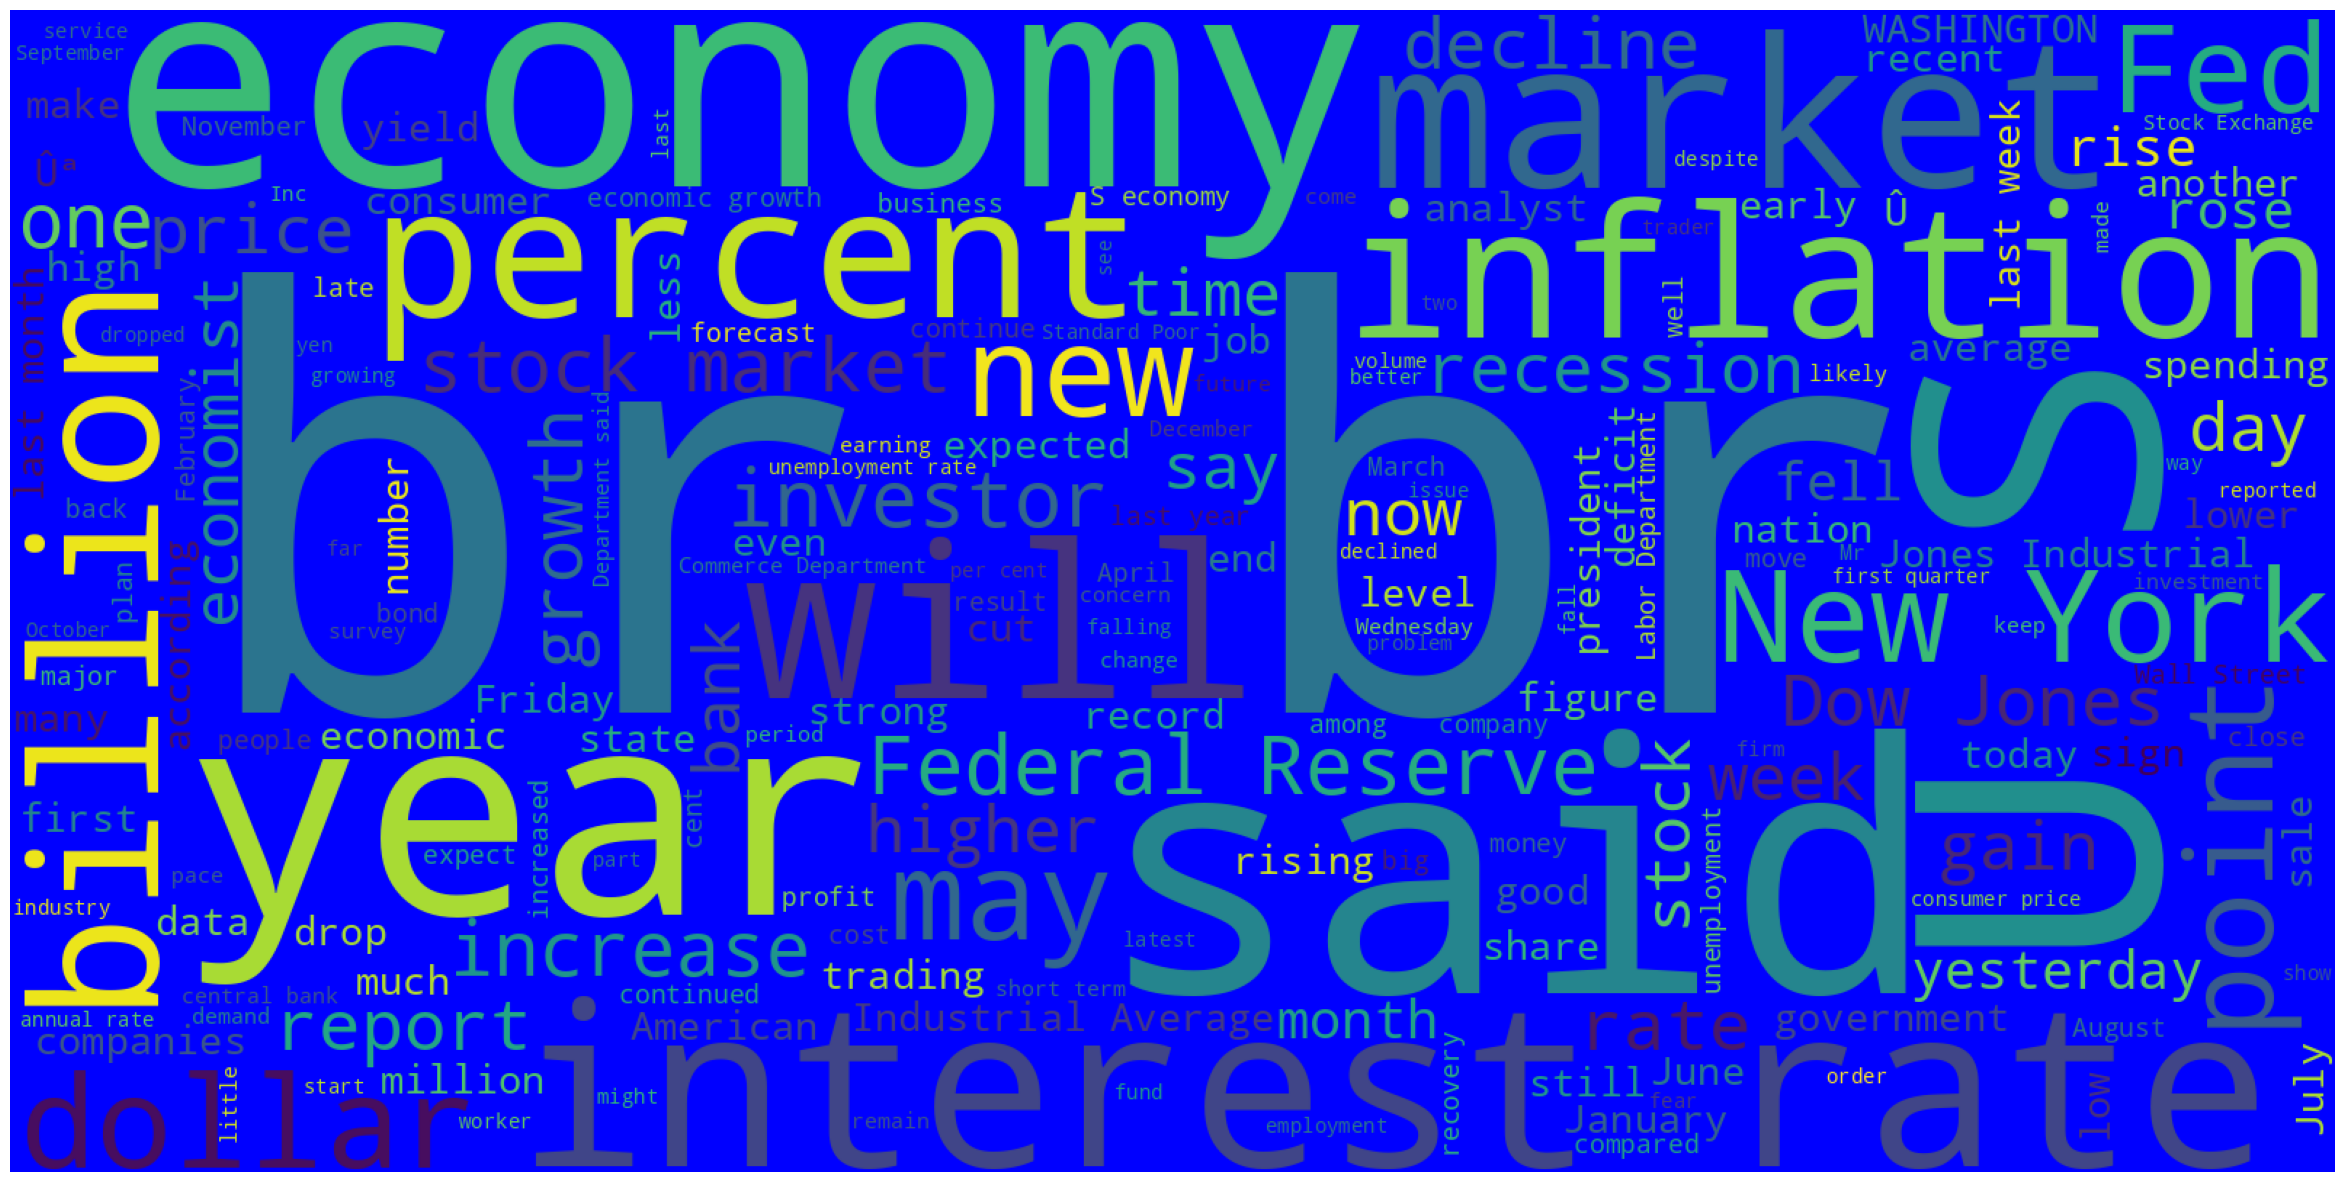

In [24]:
# Display the wordcloud for US Economy News Articles
display_wordcloud(x_train[y_train==1])

In [30]:
import nltk
#nltk.download()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [32]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [33]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [50]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [46]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [47]:
editorial = "Microcrystalline Cellulose (MCC) is chemically inert. The human body does not absorb it. The skin does not react to it. But it has several useful physical properties such as being a binder and texturiser, which is why it has varied applications in the pharmaceutical, food, cosmetics and other industries. MCC can add weight to a drug and facilitate the active ingredients to function effectively while making the drug conform to weight specifications. On Monday (June 30, 2025), however, the pharma unit of Sigachi Industries in Hyderabad, which makes this benign substance, was the scene of a lethal accident, with the toll rising to 36 on Tuesday (July 1, 2025). The making of this safe substance does involve risky processes, which can, however, be safe if appropriate procedures are followed by trained personnel. Most of the dead are young, poor, migrant workers from northern and eastern India who often lack social support. The Telangana government has announced an ex gratia of ₹1 crore and efforts must be made to ensure it reaches the families. It does seem that the response of mitigation agencies was timely and is ongoing."

In [48]:
editorial

'Microcrystalline Cellulose (MCC) is chemically inert. The human body does not absorb it. The skin does not react to it. But it has several useful physical properties such as being a binder and texturiser, which is why it has varied applications in the pharmaceutical, food, cosmetics and other industries. MCC can add weight to a drug and facilitate the active ingredients to function effectively while making the drug conform to weight specifications. On Monday (June 30, 2025), however, the pharma unit of Sigachi Industries in Hyderabad, which makes this benign substance, was the scene of a lethal accident, with the toll rising to 36 on Tuesday (July 1, 2025). The making of this safe substance does involve risky processes, which can, however, be safe if appropriate procedures are followed by trained personnel. Most of the dead are young, poor, migrant workers from northern and eastern India who often lack social support. The Telangana government has announced an ex gratia of ₹1 crore and

In [51]:
from nltk import word_tokenize, sent_tokenize
word_tokenize(editorial)

['Microcrystalline',
 'Cellulose',
 '(',
 'MCC',
 ')',
 'is',
 'chemically',
 'inert',
 '.',
 'The',
 'human',
 'body',
 'does',
 'not',
 'absorb',
 'it',
 '.',
 'The',
 'skin',
 'does',
 'not',
 'react',
 'to',
 'it',
 '.',
 'But',
 'it',
 'has',
 'several',
 'useful',
 'physical',
 'properties',
 'such',
 'as',
 'being',
 'a',
 'binder',
 'and',
 'texturiser',
 ',',
 'which',
 'is',
 'why',
 'it',
 'has',
 'varied',
 'applications',
 'in',
 'the',
 'pharmaceutical',
 ',',
 'food',
 ',',
 'cosmetics',
 'and',
 'other',
 'industries',
 '.',
 'MCC',
 'can',
 'add',
 'weight',
 'to',
 'a',
 'drug',
 'and',
 'facilitate',
 'the',
 'active',
 'ingredients',
 'to',
 'function',
 'effectively',
 'while',
 'making',
 'the',
 'drug',
 'conform',
 'to',
 'weight',
 'specifications',
 '.',
 'On',
 'Monday',
 '(',
 'June',
 '30',
 ',',
 '2025',
 ')',
 ',',
 'however',
 ',',
 'the',
 'pharma',
 'unit',
 'of',
 'Sigachi',
 'Industries',
 'in',
 'Hyderabad',
 ',',
 'which',
 'makes',
 'this',
 'beni

In [52]:
sent_tokenize(editorial)

['Microcrystalline Cellulose (MCC) is chemically inert.',
 'The human body does not absorb it.',
 'The skin does not react to it.',
 'But it has several useful physical properties such as being a binder and texturiser, which is why it has varied applications in the pharmaceutical, food, cosmetics and other industries.',
 'MCC can add weight to a drug and facilitate the active ingredients to function effectively while making the drug conform to weight specifications.',
 'On Monday (June 30, 2025), however, the pharma unit of Sigachi Industries in Hyderabad, which makes this benign substance, was the scene of a lethal accident, with the toll rising to 36 on Tuesday (July 1, 2025).',
 'The making of this safe substance does involve risky processes, which can, however, be safe if appropriate procedures are followed by trained personnel.',
 'Most of the dead are young, poor, migrant workers from northern and eastern India who often lack social support.',
 'The Telangana government has annou

In [53]:
def clean(doc):
    doc = doc.replace("</br>", " ")
    # remove punctuation and numbers
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = doc.lower()
    tokens = nltk.word_tokenize(doc)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]
    return " ".join(filtered_tokens)

In [54]:
# import feature extraction method from sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vect = CountVectorizer(preprocessor=clean)

%time x_train_dtm = vect.fit_transform(x_train)
print(x_train_dtm.shape)

CPU times: user 13.5 s, sys: 195 ms, total: 13.7 s
Wall time: 13.8 s
(6000, 39532)


In [55]:
pd.DataFrame(x_train_dtm.toarray())

,0,1,2,3,4,5,6,7,8,9,...,39522,39523,39524,39525,39526,39527,39528,39529,39530,39531
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Step 4 - Data Preprocessing on test data (x_test)

In [56]:
x_test_dtm = vect.transform(x_test)
print(x_test_dtm.shape)

(2000, 39532)


# Step 5 - Building a Model (Naive Bayes Classifier)

--- This model is only for classifier problem and specifically for text analytics

In [57]:
# Niave Bayes Theorem - Text Analytics

from sklearn.naive_bayes import MultinomialNB
nbayes = MultinomialNB()
%time nbayes.fit(x_train_dtm, y_train)

CPU times: user 7.12 ms, sys: 941 µs, total: 8.06 ms
Wall time: 10.7 ms


MultinomialNB()

# Step 6 - Evaluating on Train data

In [58]:
from sklearn import metrics
y_train_pred = nbayes.predict(x_train_dtm)
metrics.accuracy_score(y_train, y_train_pred)

0.829

# Step 7 - Evaluate on Test Data

In [59]:
y_test_pred = nbayes.predict(x_test_dtm)
metrics.accuracy_score(y_test, y_test_pred)

0.767

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

In [61]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1645
           1       0.38      0.48      0.42       355

    accuracy                           0.77      2000
   macro avg       0.63      0.66      0.64      2000
weighted avg       0.79      0.77      0.78      2000



In [62]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      4935
           1       0.51      0.75      0.61      1065

    accuracy                           0.83      6000
   macro avg       0.73      0.80      0.75      6000
weighted avg       0.86      0.83      0.84      6000



# Random Forest Classifier model

In [63]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_dtm, y_train)

RandomForestClassifier()

In [64]:
y_train_pred1 = rf.predict(x_train_dtm)
print("Training Accuracy :",metrics.accuracy_score(y_train, y_train_pred1))

y_test_pred1 = rf.predict(x_test_dtm)
print("Test Accuracy :",metrics.accuracy_score(y_test, y_test_pred1))

Training Accuracy : 1.0
Test Accuracy : 0.8215


In [67]:
x_train_dtm.shape, y_train.shape

((6000, 39532), (6000,))

In [68]:
# Cross Validation method
#from sklearn.model_selection import cross_val_score
#training = cross_val_score(estimator=rf, x_train_dtm, y_train, cv=10,)
#training.mean()

In [69]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(x_train_dtm, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [70]:
y_train_pred2 = xg.predict(x_train_dtm)
print("Training Accuracy :",metrics.accuracy_score(y_train, y_train_pred2))

y_test_pred2 = xg.predict(x_test_dtm)
print("Test Accuracy :",metrics.accuracy_score(y_test, y_test_pred2))

Training Accuracy : 0.9718333333333333
Test Accuracy : 0.8155
